## Results of the No null and No Imputation Data
<hr/>

</h3>We considered the data which has no null values and no imputation techniques used where all the values are dropped off....</h3>


<h4>        Aims and Goals of this Experiment</h4>
<ul>
    <li> What are MAPE and MAE scores of train and test data </li>
    <li> Levraging SARIMA models to capture seasonal difference </li>
</ul>
    

In [1]:
import pandas as pd
import numpy as np
import joblib
import pmdarima as pm
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [2]:
df1 = pd.read_csv("../../../../main/sub_data/single_variant/no_null/sin_ndlc_psp_no_null.csv",index_col='Date',parse_dates=True)
# Reading the First Difference Data
df2 = pd.read_csv("../../../../main/sub_data/single_variant/no_null/sin_ndlc_psp_no_null_diff1.csv",index_col='Date',parse_dates=True)
# Reading the Second Difference Data
df3 = pd.read_csv("../../../../main/sub_data/single_variant/no_null/sin_ndlc_psp_no_null_diff2.csv",index_col='Date',parse_dates=True)

In [3]:
df1 = df1.drop("Unnamed: 0",axis=1)
df1.head()

,Max.Demand met during the day (MW)
Date,
2013-04-01,2776.0
2013-04-02,3034.0
2013-04-03,2991.0
2013-04-04,3125.0
2013-04-05,3160.0


In [4]:
df2.head()

,Max.Demand met during the day (MW)
Date,
2013-04-02,258.0
2013-04-03,-43.0
2013-04-04,134.0
2013-04-05,35.0
2013-04-06,-7.0


In [5]:
df3.head()

,Max.Demand met during the day (MW)
Date,
2013-04-03,-301.0
2013-04-04,177.0
2013-04-05,-99.0
2013-04-06,-42.0
2013-04-07,-91.0


## We first Divide our data into train and Test data

In [6]:
df1_train = df1.loc[:'2023-04-30']
df1_test = df1.loc['2023-05-01':]
df1_train.to_csv("../../../../main/sub_data/single_variant/no_null/train/train_no_null.csv")
df1_test.to_csv("../../../../main/sub_data/single_variant/no_null/test/test_no_null.csv")

## AR(1) model according to the ACF and PACF plots

In [7]:
def get_MAPE_MAE_test(dataframe,results):
    actual_values = np.array(dataframe)
    predicted_values = np.array(pd.DataFrame(results.forecast(len(actual_values)))["predicted_mean"])
    APE = np.abs((actual_values - predicted_values) / actual_values) * 100
    MAPE = np.mean(APE)
    MAE = np.mean(np.abs(results.resid))
    print("The MAPE Score is : ",MAPE)
    print("The MAE Score is :", MAE)
    return MAPE, MAE

def get_MAPE_MAE(dataframe,results):
    actual_values = np.array(dataframe)
    predicted_values = np.array(results.fittedvalues)
    APE = np.abs((actual_values - predicted_values) / actual_values) * 100
    MAPE = np.mean(APE)
    MAE = np.mean(np.abs(results.resid))
    print("The MAPE Score is : ",MAPE)
    print("The MAE Score is :", MAE)
    return MAPE, MAE



In [8]:
ar1_model = ARIMA(df1_train,order=(1,0,0))
ar1_results = ar1_model.fit()
print(ar1_results.summary())

                                       SARIMAX Results                                        
Dep. Variable:     Max.Demand met during the day (MW)   No. Observations:                 3609
Model:                                 ARIMA(1, 0, 0)   Log Likelihood              -25264.358
Date:                                Fri, 14 Jul 2023   AIC                          50534.716
Time:                                        21:53:47   BIC                          50553.290
Sample:                                             0   HQIC                         50541.334
                                               - 3609                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4351.3703    126.820     34.311      0.000    4102.807    4599.934
ar.

/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [9]:
get_MAPE_MAE_test(df1_test,ar1_results)
print("------------------------------------------------------------")
get_MAPE_MAE(df1_train,ar1_results)

The MAPE Score is :  19.483704614997844
The MAE Score is : 190.1317747699149
------------------------------------------------------------
The MAPE Score is :  26.12598080316118
The MAE Score is : 190.1317747699149


/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


(26.12598080316118, 190.1317747699149)

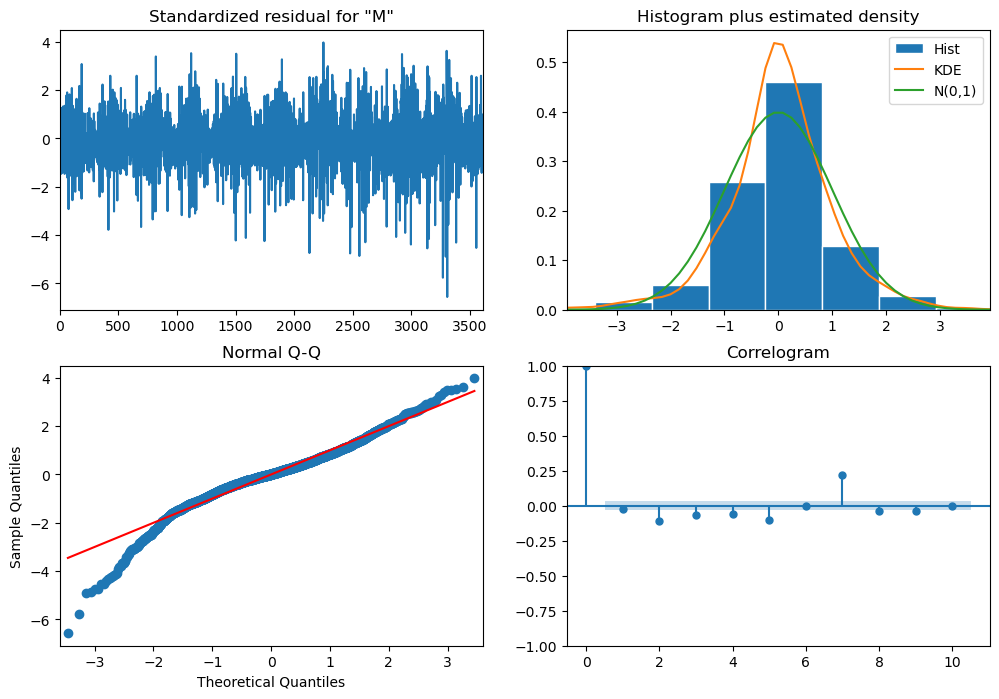

In [10]:
ar1_results.plot_diagnostics(figsize=(12,8))
plt.show()

In [11]:
ar2_model = ARIMA(df1_train,order=(2,0,0))
ar2_results = ar2_model.fit()
print(ar2_results.summary())

                                       SARIMAX Results                                        
Dep. Variable:     Max.Demand met during the day (MW)   No. Observations:                 3609
Model:                                 ARIMA(2, 0, 0)   Log Likelihood              -25263.181
Date:                                Fri, 14 Jul 2023   AIC                          50534.362
Time:                                        21:53:48   BIC                          50559.127
Sample:                                             0   HQIC                         50543.186
                                               - 3609                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4351.3704    133.257     32.654      0.000    4090.191    4612.550
ar.

/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [12]:
get_MAPE_MAE_test(df1_test,ar2_results)
print("------------------------------------------------------------")
get_MAPE_MAE(df1_train,ar2_results)

The MAPE Score is :  19.51663460625155
The MAE Score is : 190.12640410050847
------------------------------------------------------------
The MAPE Score is :  26.126661124830203
The MAE Score is : 190.12640410050847


/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


(26.126661124830203, 190.12640410050847)

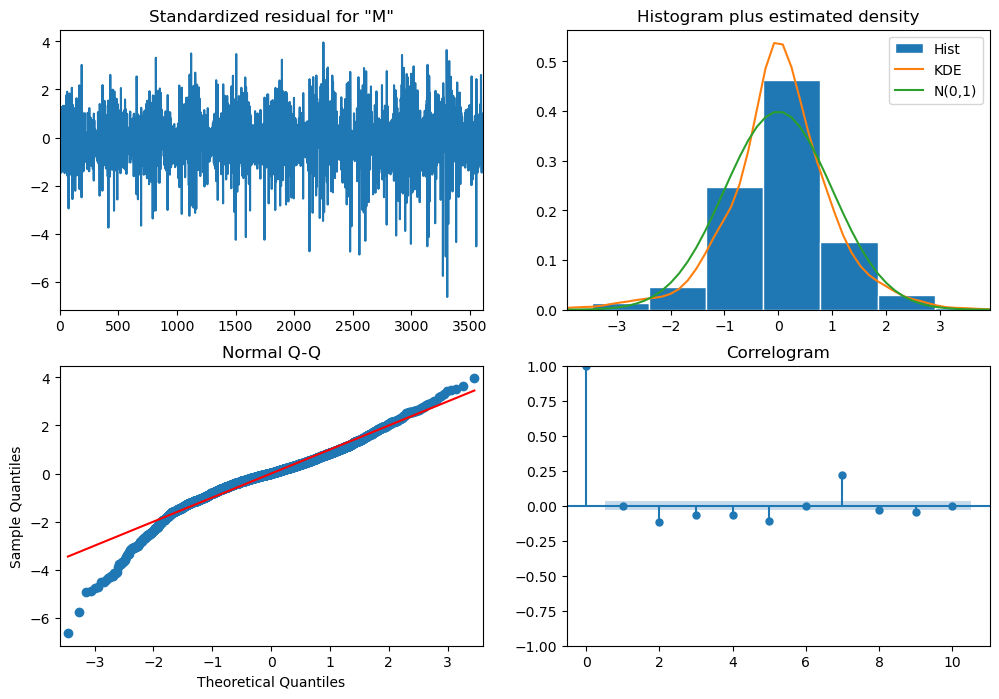

In [13]:
ar2_results.plot_diagnostics(figsize=(12,8))
plt.show()

In [14]:
ar3_model = ARIMA(df1_train,order=(1,1,0))
ar3_results = ar3_model.fit()
print(ar3_results.summary())

                                       SARIMAX Results                                        
Dep. Variable:     Max.Demand met during the day (MW)   No. Observations:                 3609
Model:                                 ARIMA(1, 1, 0)   Log Likelihood              -25285.533
Date:                                Fri, 14 Jul 2023   AIC                          50575.065
Time:                                        21:53:49   BIC                          50587.447
Sample:                                             0   HQIC                         50579.477
                                               - 3609                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0430      0.013     -3.238      0.001      -0.069      -0.017
sig

/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [15]:
get_MAPE_MAE_test(df1_test,ar3_results)
print("------------------------------------------------------------")
get_MAPE_MAE(df1_train,ar3_results)

The MAPE Score is :  21.903771623900294
The MAE Score is : 191.54576815099736
------------------------------------------------------------
The MAPE Score is :  26.602150534015117
The MAE Score is : 191.54576815099736


/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


(26.602150534015117, 191.54576815099736)

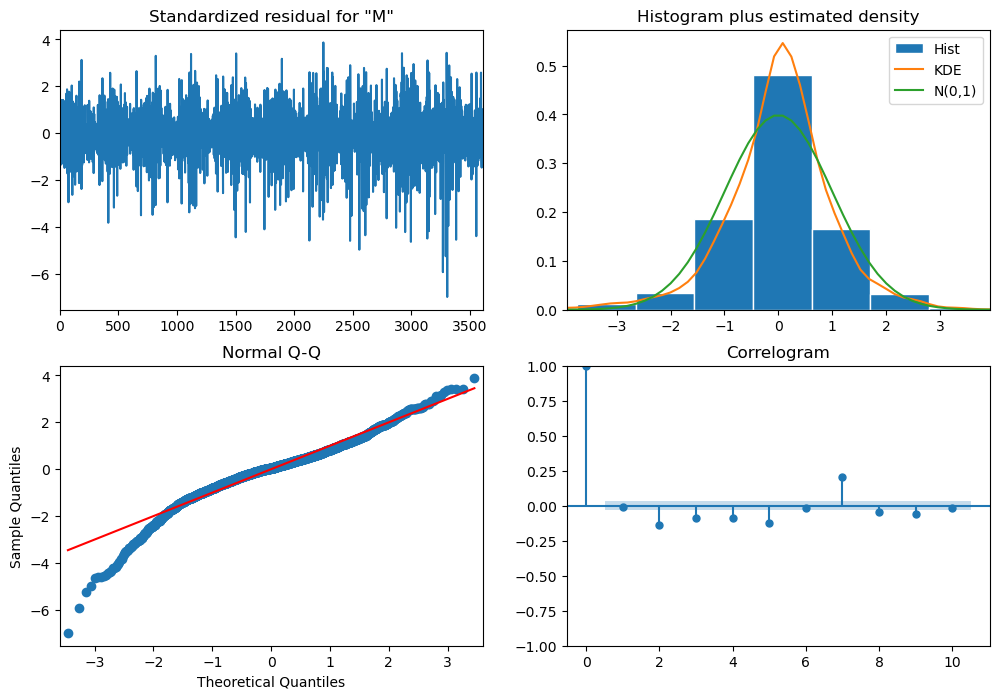

In [16]:
ar3_results.plot_diagnostics(figsize=(12,8))
plt.show()

In [17]:
ar4_model = ARIMA(df1,order=(1,2,0))
ar4_results = ar4_model.fit()
print(ar4_results.summary())

                                       SARIMAX Results                                        
Dep. Variable:     Max.Demand met during the day (MW)   No. Observations:                 3640
Model:                                 ARIMA(1, 2, 0)   Log Likelihood              -26410.519
Date:                                Fri, 14 Jul 2023   AIC                          52825.038
Time:                                        21:53:49   BIC                          52837.437
Sample:                                             0   HQIC                         52829.454
                                               - 3640                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4572      0.011    -43.525      0.000      -0.478      -0.437
sig

/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [18]:
get_MAPE_MAE_test(df1_test,ar4_results)
print("------------------------------------------------------------")
get_MAPE_MAE(df1_train,ar4_results)

The MAPE Score is :  90.59462305951965
The MAE Score is : 248.28890399331948
------------------------------------------------------------
The MAPE Score is :  27.274191435362965
The MAE Score is : 248.28890399331948


/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


(27.274191435362965, 248.28890399331948)

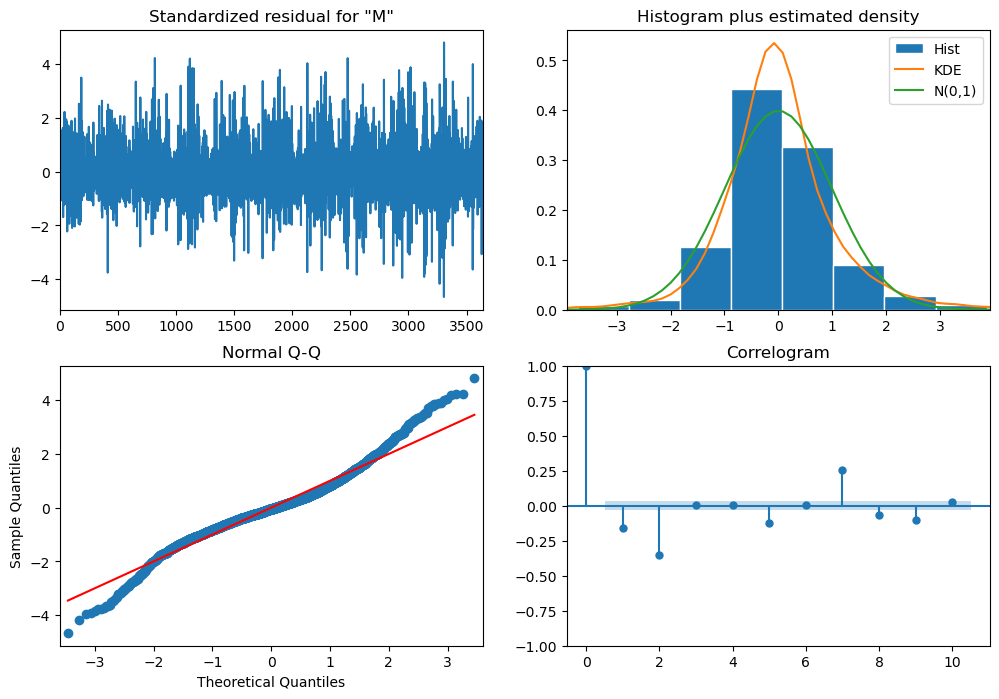

In [19]:
ar4_results.plot_diagnostics(figsize=(12,8))
plt.show()

In [20]:
ma1_model = ARIMA(df1_train,order=(0,0,1))
ma1_results = ma1_model.fit()
print(ma1_results.summary())

                                       SARIMAX Results                                        
Dep. Variable:     Max.Demand met during the day (MW)   No. Observations:                 3609
Model:                                 ARIMA(0, 0, 1)   Log Likelihood              -28124.484
Date:                                Fri, 14 Jul 2023   AIC                          56254.968
Time:                                        21:53:50   BIC                          56273.542
Sample:                                             0   HQIC                         56261.586
                                               - 3609                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4351.3169     19.278    225.719      0.000    4313.534    4389.100
ma.

/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [21]:
get_MAPE_MAE_test(df1_test,ma1_results)
print("------------------------------------------------------------")
get_MAPE_MAE(df1_train,ma1_results)

/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


The MAPE Score is :  16.617405151595573
The MAE Score is : 483.42189301402726
------------------------------------------------------------
The MAPE Score is :  21.619125110023326
The MAE Score is : 483.42189301402726


(21.619125110023326, 483.42189301402726)

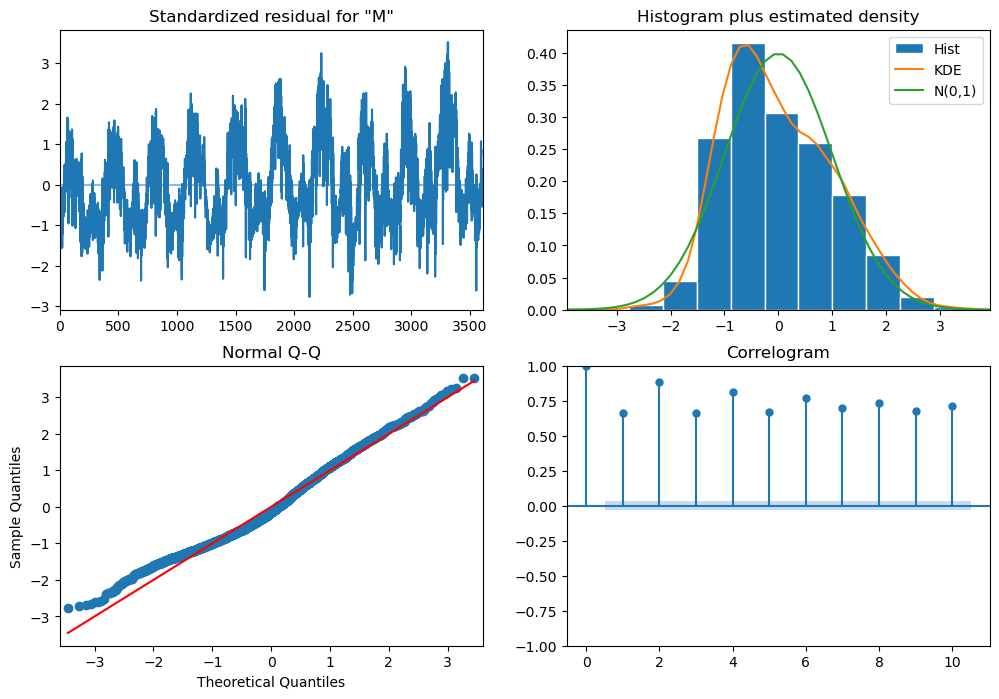

In [22]:
ma1_results.plot_diagnostics(figsize=(12,8))
plt.show()

In [23]:
ma2_model = ARIMA(df1_train,order=(0,1,1))
ma2_results = ma2_model.fit()
print(ma2_results.summary())

                                       SARIMAX Results                                        
Dep. Variable:     Max.Demand met during the day (MW)   No. Observations:                 3609
Model:                                 ARIMA(0, 1, 1)   Log Likelihood              -25284.277
Date:                                Fri, 14 Jul 2023   AIC                          50572.554
Time:                                        21:53:50   BIC                          50584.936
Sample:                                             0   HQIC                         50576.966
                                               - 3609                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0596      0.013     -4.487      0.000      -0.086      -0.034
sig

/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [24]:
get_MAPE_MAE_test(df1_test,ma2_results)
print("------------------------------------------------------------")
get_MAPE_MAE(df1_train,ma2_results)

The MAPE Score is :  21.81117152522028
The MAE Score is : 191.6784028358383
------------------------------------------------------------
The MAPE Score is :  26.594015692330853
The MAE Score is : 191.6784028358383


/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


(26.594015692330853, 191.6784028358383)

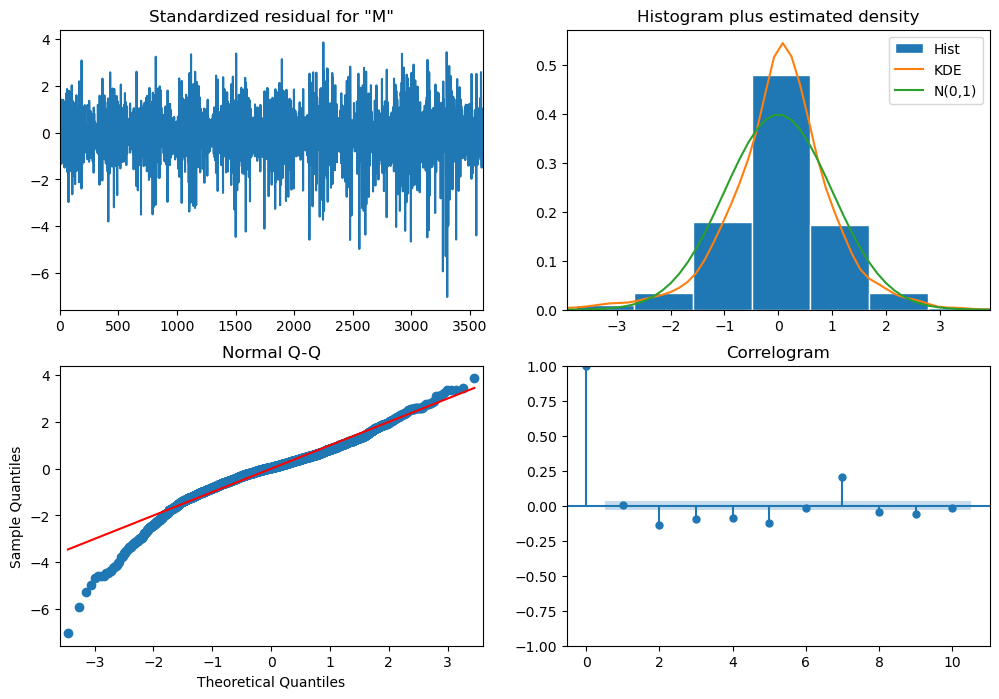

In [25]:
ma2_results.plot_diagnostics(figsize=(12,8))
plt.show()

In [26]:
ma3_model = ARIMA(df1_train,order=(0,2,1))
ma3_results = ma3_model.fit()
print(ma3_results.summary())

                                       SARIMAX Results                                        
Dep. Variable:     Max.Demand met during the day (MW)   No. Observations:                 3609
Model:                                 ARIMA(0, 2, 1)   Log Likelihood              -25287.230
Date:                                Fri, 14 Jul 2023   AIC                          50578.459
Time:                                        21:53:51   BIC                          50590.841
Sample:                                             0   HQIC                         50582.871
                                               - 3609                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9997      0.009   -110.378      0.000      -1.017      -0.982
sig

/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [27]:
get_MAPE_MAE_test(df1_test,ar3_results)
print("------------------------------------------------------------")
get_MAPE_MAE(df1_train,ar3_results)

The MAPE Score is :  21.903771623900294
The MAE Score is : 191.54576815099736
------------------------------------------------------------
The MAPE Score is :  26.602150534015117
The MAE Score is : 191.54576815099736


/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


(26.602150534015117, 191.54576815099736)

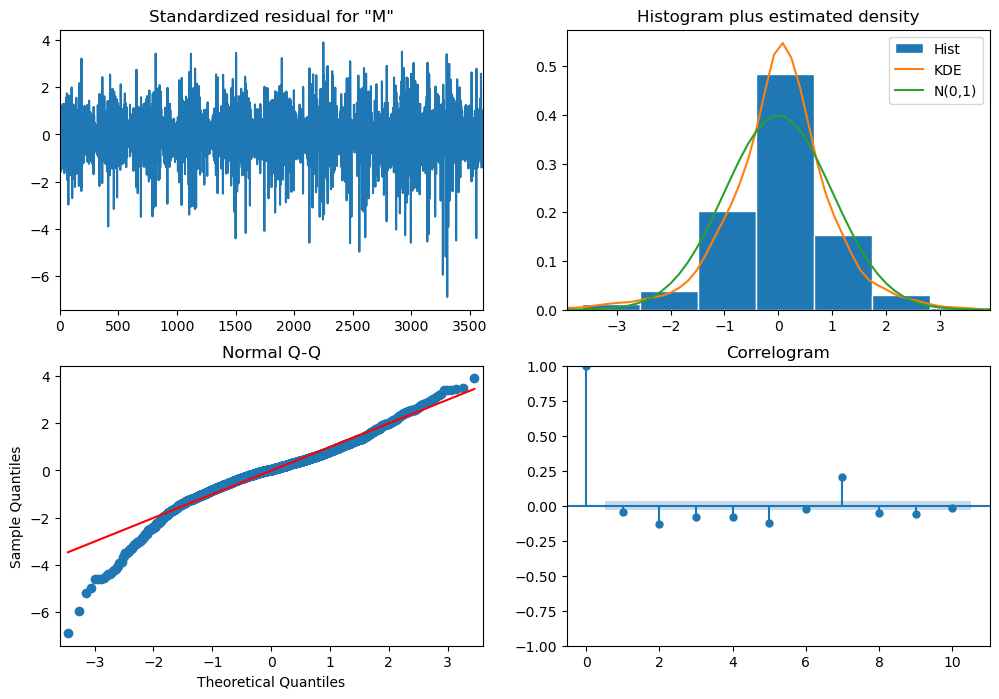

In [28]:
ma3_results.plot_diagnostics(figsize=(12,8))
plt.show()

## ARMA Models through AIC and BIC scores

In [29]:
arma_results1 = []
for p in range(10):
    for q in range(10):
        try:
            results = ARIMA(df1,order=(p,0,q)).fit()
            arma_results1.append((p,q,results.aic,results.bic))
        except:
            arma_results1.append((p,q,None,None))

/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so

/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so

/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting p

/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting p

/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so

/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. f

/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. f

/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. f

/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. f

/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._i

/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. f

/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [30]:
arma_results1 = pd.DataFrame(arma_results1,columns=['p','q','AIC','BIC'])
arma_results1.sort_values('AIC')

,p,q,AIC,BIC
88,8,8,50517.585156,50629.180458
97,9,7,50519.412970,50631.008272
89,8,9,50520.179590,50637.974630
98,9,8,50521.716962,50639.512002
99,9,9,50524.591566,50648.586345
...,...,...,...,...
3,0,3,53651.393946,53682.392641
2,0,2,54612.158698,54636.957654
1,0,1,56741.683501,56760.282718
0,0,0,60581.177892,60593.577370


In [31]:
arma_results1.sort_values('BIC')

,p,q,AIC,BIC
88,8,8,50517.585156,50629.180458
97,9,7,50519.412970,50631.008272
89,8,9,50520.179590,50637.974630
98,9,8,50521.716962,50639.512002
99,9,9,50524.591566,50648.586345
...,...,...,...,...
3,0,3,53651.393946,53682.392641
2,0,2,54612.158698,54636.957654
1,0,1,56741.683501,56760.282718
0,0,0,60581.177892,60593.577370


In [32]:
arma1_results = ARIMA(df1_train,order=(8,0,8)).fit()
print(arma1_results.summary())

/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("

                                       SARIMAX Results                                        
Dep. Variable:     Max.Demand met during the day (MW)   No. Observations:                 3609
Model:                                 ARIMA(8, 0, 8)   Log Likelihood              -25015.687
Date:                                Fri, 14 Jul 2023   AIC                          50067.375
Time:                                        21:59:57   BIC                          50178.816
Sample:                                             0   HQIC                         50107.085
                                               - 3609                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4351.3704    558.757      7.788      0.000    3256.227    5446.514
ar.

In [33]:
get_MAPE_MAE_test(df1_test,arma1_results)
print("------------------------------------------------------------")
get_MAPE_MAE(df1_train,arma1_results)

The MAPE Score is :  18.157517497238146
The MAE Score is : 175.18314903551112
------------------------------------------------------------
The MAPE Score is :  26.332074193146546
The MAE Score is : 175.18314903551112


/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


(26.332074193146546, 175.18314903551112)

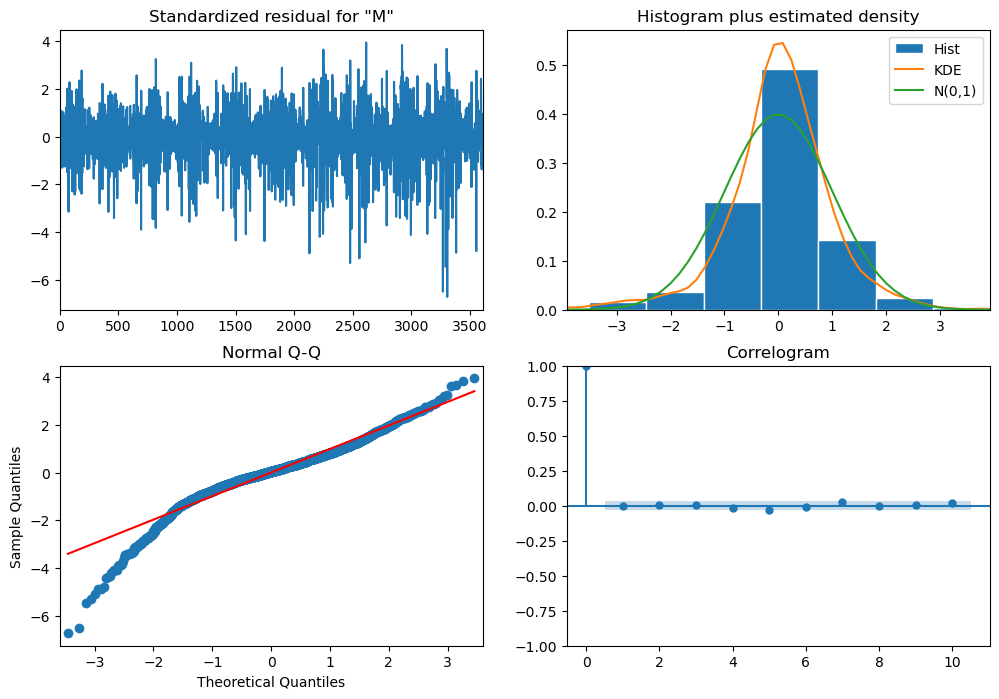

In [34]:
arma1_results.plot_diagnostics(figsize=(12,8))
plt.show()

In [35]:
arma2_results = ARIMA(df1_train,order=(8,1,8)).fit()
print(arma2_results.summary())

/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting p

                                       SARIMAX Results                                        
Dep. Variable:     Max.Demand met during the day (MW)   No. Observations:                 3609
Model:                                 ARIMA(8, 1, 8)   Log Likelihood              -25057.443
Date:                                Fri, 14 Jul 2023   AIC                          50148.885
Time:                                        22:00:04   BIC                          50254.131
Sample:                                             0   HQIC                         50186.388
                                               - 3609                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5491      0.085      6.490      0.000       0.383       0.715
ar.

In [36]:
get_MAPE_MAE_test(df1_test,arma2_results)
print("------------------------------------------------------------")
get_MAPE_MAE(df1_train,arma2_results)

The MAPE Score is :  18.814287240120983
The MAE Score is : 180.29252276334864
------------------------------------------------------------
The MAPE Score is :  26.45363092534866
The MAE Score is : 180.29252276334864


/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


(26.45363092534866, 180.29252276334864)

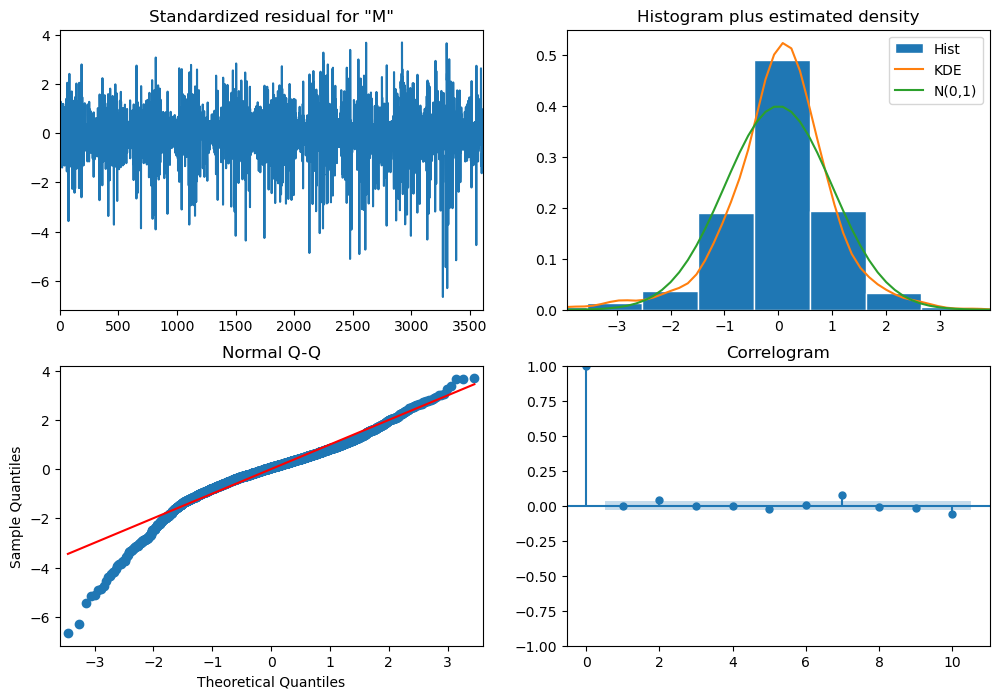

In [37]:
arma2_results.plot_diagnostics(figsize=(12,8))
plt.show()

In [38]:
arma3_results = ARIMA(df1_train,order=(9,0,7)).fit()
print(arma3_results.summary())

/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting p

                                       SARIMAX Results                                        
Dep. Variable:     Max.Demand met during the day (MW)   No. Observations:                 3609
Model:                                 ARIMA(9, 0, 7)   Log Likelihood              -25015.864
Date:                                Fri, 14 Jul 2023   AIC                          50067.729
Time:                                        22:00:11   BIC                          50179.170
Sample:                                             0   HQIC                         50107.439
                                               - 3609                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4351.3704    245.509     17.724      0.000    3870.182    4832.559
ar.

In [39]:
get_MAPE_MAE_test(df1_test,arma3_results)
print("------------------------------------------------------------")
get_MAPE_MAE(df1_train,arma3_results)

The MAPE Score is :  18.201416822536345
The MAE Score is : 174.84584761799468
------------------------------------------------------------
The MAPE Score is :  26.22640319428216
The MAE Score is : 174.84584761799468


/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


(26.22640319428216, 174.84584761799468)

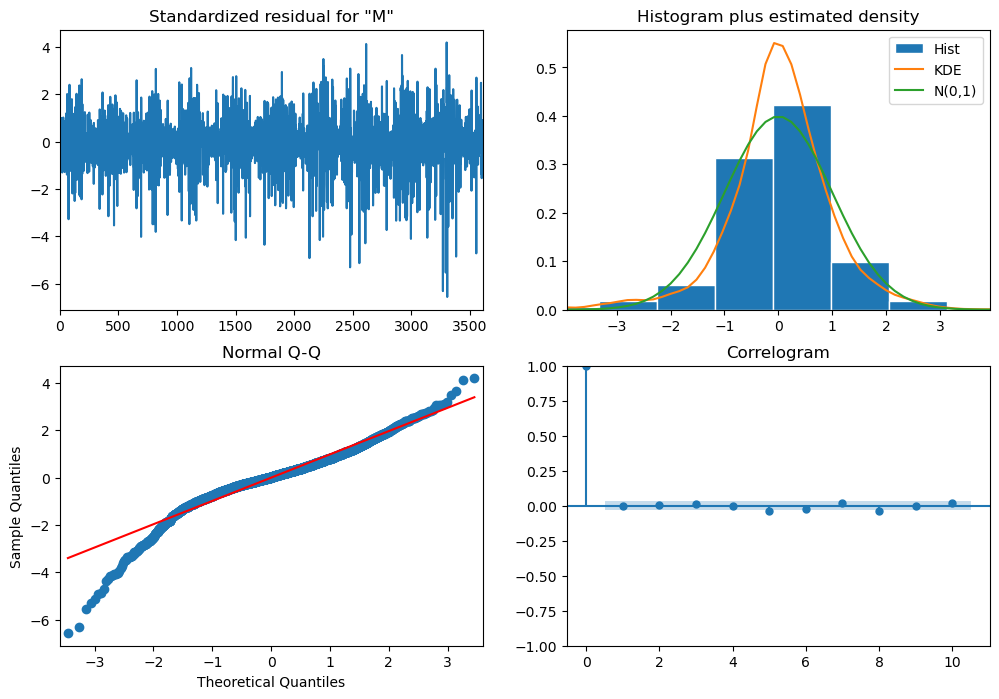

In [40]:
arma3_results.plot_diagnostics(figsize=(12,8))
plt.show()

In [41]:
arma4_results = ARIMA(df1_train,order=(9,1,7)).fit()
print(arma4_results.summary())

/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting p

                                       SARIMAX Results                                        
Dep. Variable:     Max.Demand met during the day (MW)   No. Observations:                 3609
Model:                                 ARIMA(9, 1, 7)   Log Likelihood              -25010.519
Date:                                Fri, 14 Jul 2023   AIC                          50055.038
Time:                                        22:00:17   BIC                          50160.283
Sample:                                             0   HQIC                         50092.541
                                               - 3609                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2144      0.051     -4.227      0.000      -0.314      -0.115
ar.

/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [42]:
get_MAPE_MAE_test(df1_test,arma4_results)
print("------------------------------------------------------------")
get_MAPE_MAE(df1_train,arma4_results)

/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


The MAPE Score is :  18.33239660709786
The MAE Score is : 175.64726873704524
------------------------------------------------------------
The MAPE Score is :  26.45391680855796
The MAE Score is : 175.64726873704524


(26.45391680855796, 175.64726873704524)

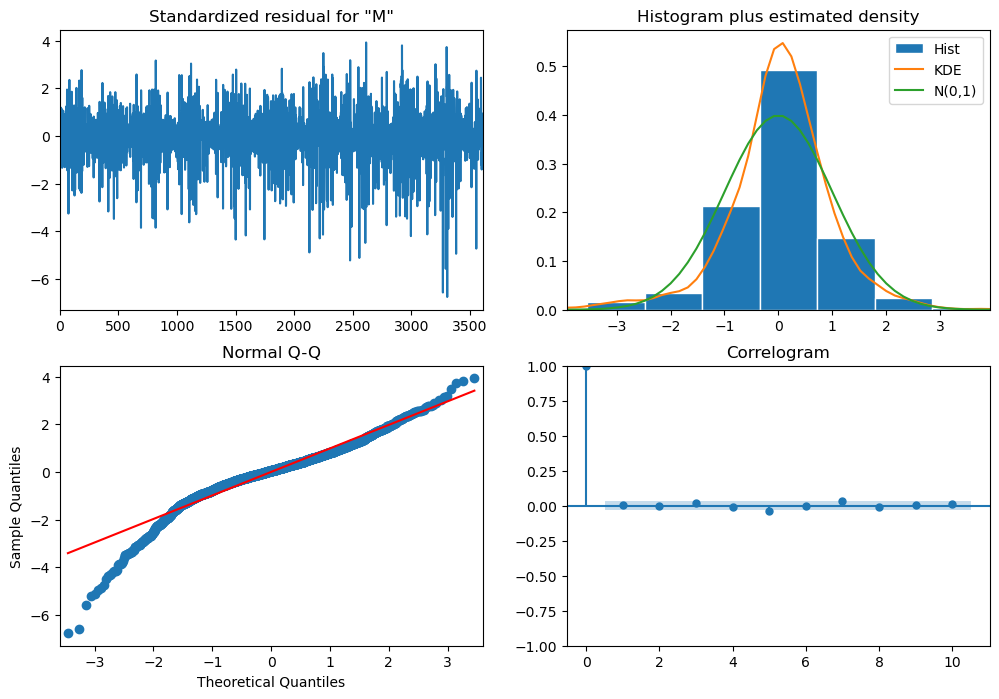

In [43]:
arma4_results.plot_diagnostics(figsize=(12,8))
plt.show()

In [44]:
arma5_results = ARIMA(df1_train,order=(8,0,9)).fit()
print(arma5_results.summary())

/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("

                                       SARIMAX Results                                        
Dep. Variable:     Max.Demand met during the day (MW)   No. Observations:                 3609
Model:                                 ARIMA(8, 0, 9)   Log Likelihood              -25015.352
Date:                                Fri, 14 Jul 2023   AIC                          50068.705
Time:                                        22:00:25   BIC                          50186.337
Sample:                                             0   HQIC                         50110.621
                                               - 3609                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4351.3704    362.089     12.017      0.000    3641.689    5061.052
ar.

In [45]:
get_MAPE_MAE_test(df1_test,arma5_results)
print("------------------------------------------------------------")
get_MAPE_MAE(df1_train,arma5_results)

The MAPE Score is :  18.135742384141977
The MAE Score is : 175.27118131898197
------------------------------------------------------------
The MAPE Score is :  26.280096418717633
The MAE Score is : 175.27118131898197


/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


(26.280096418717633, 175.27118131898197)

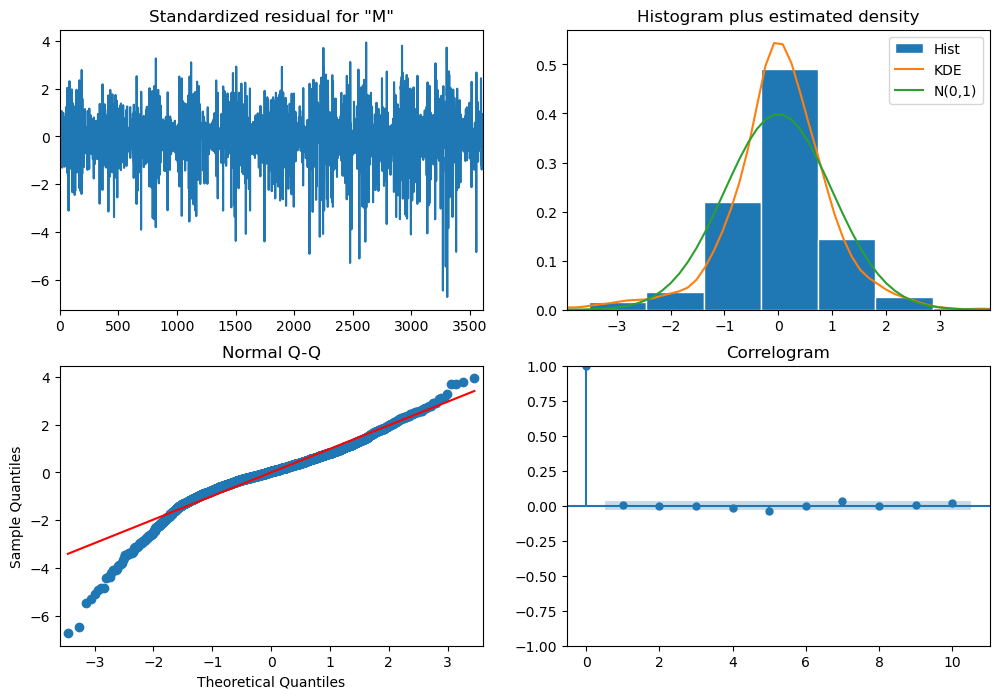

In [46]:
arma5_results.plot_diagnostics(figsize=(12,8))
plt.show()

In [47]:
arma6_results = ARIMA(df1_train,order=(8,1,9)).fit()
print(arma6_results.summary())

/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting p

                                       SARIMAX Results                                        
Dep. Variable:     Max.Demand met during the day (MW)   No. Observations:                 3609
Model:                                 ARIMA(8, 1, 9)   Log Likelihood              -25011.665
Date:                                Fri, 14 Jul 2023   AIC                          50059.330
Time:                                        22:00:32   BIC                          50170.766
Sample:                                             0   HQIC                         50099.039
                                               - 3609                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4142      0.462      0.897      0.370      -0.491       1.320
ar.

In [48]:
get_MAPE_MAE_test(df1_test,arma6_results)
print("------------------------------------------------------------")
get_MAPE_MAE(df1_train,arma6_results)

The MAPE Score is :  18.274441023575374
The MAE Score is : 175.24052966043453
------------------------------------------------------------
The MAPE Score is :  26.464652112441957
The MAE Score is : 175.24052966043453


/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


(26.464652112441957, 175.24052966043453)

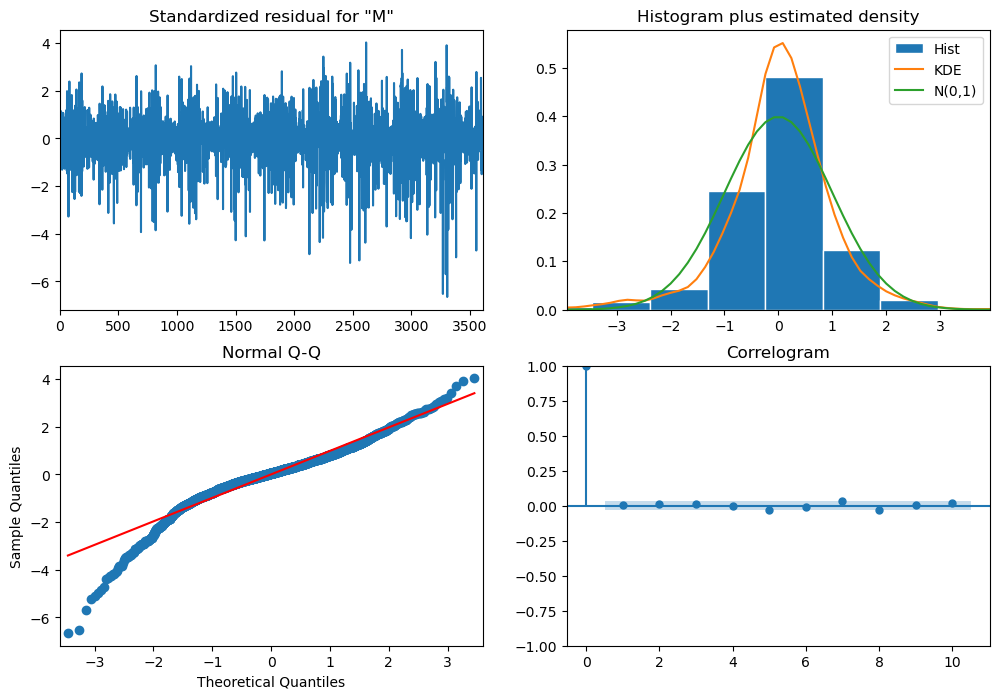

In [49]:
arma6_results.plot_diagnostics(figsize=(12,8))
plt.show()

In [50]:
# Create auto_arima model
model1 = pm.auto_arima(df1_train,
                      seasonal=True, 
                      error_action='ignore',
                      suppress_warnings=True)

# Create auto_arima model
model2 = pm.auto_arima(df1_train,
                      seasonal=False, 
                      error_action='ignore',
                      suppress_warnings=True) 

# Print model summary
print(model1.summary())
print(model2.summary())



/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal
  ret

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3609
Model:               SARIMAX(5, 1, 3)   Log Likelihood              -25086.121
Date:                Fri, 14 Jul 2023   AIC                          50190.242
Time:                        22:01:49   BIC                          50245.961
Sample:                             0   HQIC                         50210.097
                               - 3609                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1736      0.036      4.844      0.000       0.103       0.244
ar.L2         -0.7786      0.023    -34.442      0.000      -0.823      -0.734
ar.L3          0.4457      0.047      9.578      0.0

In [51]:
model1 = ARIMA(df1_train,order=(5,1,3)).fit()

/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting p

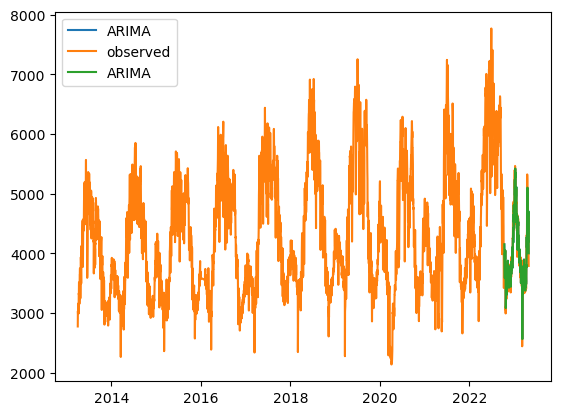

In [52]:
# Create ARIMA mean forecast
arima_pred = model1.get_prediction(start=-200)
arima_mean = arima_pred.predicted_mean

# Plot mean ARIMA and SARIMA predictions and observed
plt.plot(arima_mean.index,arima_mean, label='ARIMA')
plt.plot(df1_train.index,df1_train["Max.Demand met during the day (MW)"], label='observed')
plt.plot(arima_mean.index,arima_mean, label='ARIMA')
plt.legend()
plt.show()

In [53]:
get_MAPE_MAE(df1_train,model1)
get_MAPE_MAE_test(df1_test,model1)

The MAPE Score is :  26.454331439884392
The MAE Score is : 183.18754528966116
The MAPE Score is :  18.844119557548925
The MAE Score is : 183.18754528966116


/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


(18.844119557548925, 183.18754528966116)